## Precision and Recall
- 정밀도와 재현율 공식
- 정밀도(Precision) = TP / (FP + TP)  :  예측 Positive일 때 맞춘 비율 (양성 예측도)
- 재현율(Recall) = TP / (FN + TP)     :  실제 Positive일 때 맞춘 비율 (민감도, TPR)
- 상황에 따라 2개의 평가 지표를 선택해서 사용<br>
    **예를 들어 (1), 암 판단 모델에서는 재현율이 중요**<br>
    why? 실제 Positive인 암 환자를 예측 Negativie로 판단하면 생명을 잃을수 있음.<br>
    하지만 실제 Negative인 건강한 환자를 예측 Positivie로 해도 재검사로 비용만 소모<br>
    **예를 들어 (2), 금융 사기 모델에서도 재현율이 중요**<br>
    why? 실제 Positive인 금융 사기를 예측 Negative로 판단하면 금전적인 손해<br>
    하지만 실제 Negative인 정상 금융 거래를 예측 Positive로 해도 재확인을 통한 검증만 하면 됨<br>
    **예를 들어 (3), 스팸 메일 여부 판단에서는 정밀도가 중요**<br>
    why? 실제 Positive인 스팸메일을 예측 Negative인 일반메일로 분류하더라도 약간의 불편함만 느낌<br>
    하지만 실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류하면 업무에 차질 생김<br>



- **재현율** : 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 큰 영향이 발생하는 경우
- **정밀도** : 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive로 잘 못 판단하게 되면 큰 영향이 발생하는 경우
- **두개다 높은 수치를 얻는 것이 이상적임**

### 타이타닉 예제로 성능 평가
- 정밀도 : precision_score()
- 재현율 : recall_score()

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from Evaluation_titanic import x_train, y_train, x_test, y_test

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 정밀도/재현율 트레이드오프 : 정밀도 또는 재현율을 강화하는 방법
### - 트레이드오프를 구현하기 위한 기본 정보

In [11]:
pred_proba = lr_clf.predict_proba(x_test)
pred = lr_clf.predict(x_test)
print('pred_proba()결과 shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출\n:', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 학률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출
: [[0.46162417 0.53837583]
 [0.87858538 0.12141462]
 [0.87723741 0.12276259]]
두 개의 class 중에서 더 학률을 클래스 값으로 예측 
 [[0.46162417 0.53837583 1.        ]
 [0.87858538 0.12141462 0.        ]
 [0.87723741 0.12276259 0.        ]]


In [15]:
print(pred_proba[5], pred[5])

[0.88231296 0.11768704] 0


### - 트레이드오프 구현
- predict_proba() 메서드가 반환해주는 확률 값을 가진 ndarray를 0.5 기준으로 임계값을 정해 최종 예측 클래스로 결정한다. 이 임계값을 조정해야 트레이드오프를 구현한다.

In [9]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold = 0.5

```
pred_proba[0:3]
```
```
array([[0.46162417, 0.53837583],
       [0.87858538, 0.12141462],
       [0.87723741, 0.12276259]])
```

```
pred_proba[0:3][:,1].shape
```
```
(3,)
```

```
pred_proba[0:3][:,1].reshape(-1,1).shape
```
```
(3, 1)
```

### - reshape에서 (3, -1) > 3행에 열( -1)은 알아서 만들어줘
### - reshape에서 (-1,3) > 행(-1)은 알아서하고 3열로 만들어줘

In [10]:
# predict_proba() 반환값의 두 번째 컬럼, 즉 Positive 클래스 컬람 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


### - 임계값을 변경해 보자

In [27]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361


- 임계값을 낮추니 재현율이 올라가고 정밀도는 내려가네~~~~~ 그런데 정확도도 떨어졌어. (108 + 47 > 97 + 50)
```
'  ------------         ------------'
'   108 |   10            97 |   21
'  ------------         ------------'
'    14 |   47            11 |   50
'  ------------         ------------'
```
 
- why? 임계값이 낮아질수록 Positive로 예측할 확률이 올라가니깐 

### - 임계값을 다양하게 적용해보자

In [29]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


## - 어느 임계값이 좋은가? 정확도가 조금 낮아도 정밀도, 재현율이 비슷한 0.45가 좋다고 한다. 하지만 상황에 따라서...

# 사이킷런에는 **precision_recall_curve()** API를 제공

In [39]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape:', thresholds.shape)

반환된 분류 결정 임곗값 배열의 shape: (143,)


In [40]:
# 반환된 임계값 배열 로우가 143건이므로 샘플로10건만 추출하되, 임곗값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]


In [41]:
# 15step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index], 3))

샘플 임계값별 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


### 시각화

In [42]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 trheshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로, 정밀도는 점선
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    # threshold 값 X축의 scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    # x축, y축 label과 legend, 그리고 grid설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

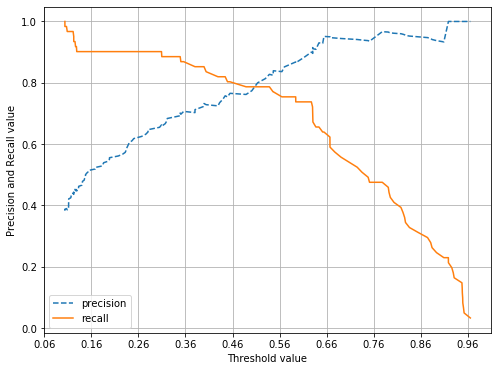

In [43]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])

### 임계값에 따라 재현율과 정밀도를 조절할 수 있으므로 상황따라 조절하여 사용해도 되지만 트레이드 오프의 평가 지표가 필요함. 